<a href="https://colab.research.google.com/github/FaisAkbar/optical_image_recognition_student_card/blob/main/UAS_PCVK_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading Data
data = pd.read_csv('/content/drive/MyDrive/PCVK/KTM/94_character_TMNIST.csv')
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# defining X and y for training
y=data[['labels']]
X=data.drop(['names','labels'],axis=1).astype('float32')

In [ ]:
#preping the data to create dictionary
labels = y['labels'].unique()
values = [num for num in range(len(data['labels'].unique()))]
label_dict= dict(zip(labels,values)) #Creating Dictionary
label_dict_inv = dict(zip(values,labels))

In [ ]:
# Mapping
y['labels'].replace(label_dict, inplace=True) #Maping Values

In [ ]:
#Checking the mappings
print(label_dict)

{'6': 0, 'D': 1, 'f': 2, '/': 3, 'F': 4, 'x': 5, 'J': 6, '8': 7, 'H': 8, 'k': 9, '@': 10, '1': 11, '=': 12, 'g': 13, ')': 14, '2': 15, 'd': 16, '^': 17, '3': 18, 't': 19, '#': 20, '.': 21, '4': 22, 'o': 23, '"': 24, 'y': 25, 'A': 26, 'u': 27, 'G': 28, '-': 29, 'm': 30, 'W': 31, '&': 32, 'c': 33, '9': 34, 'N': 35, ']': 36, 'P': 37, 'X': 38, '|': 39, '}': 40, 'h': 41, '7': 42, 'j': 43, '5': 44, '>': 45, '?': 46, 'b': 47, '*': 48, 'w': 49, 'l': 50, '0': 51, '$': 52, 'I': 53, 'Y': 54, '%': 55, ':': 56, 'T': 57, 'K': 58, 'E': 59, '<': 60, 'V': 61, '{': 62, 'M': 63, 'S': 64, 'a': 65, 'i': 66, 'r': 67, "'": 68, 'p': 69, ';': 70, '[': 71, '+': 72, 'e': 73, 'U': 74, '(': 75, 's': 76, '~': 77, ',': 78, 'C': 79, 'q': 80, '_': 81, 'n': 82, 'B': 83, 'z': 84, 'v': 85, 'O': 86, 'R': 87, '`': 88, 'Z': 89, 'Q': 90, 'L': 91, '!': 92, '\\': 93}


In [ ]:
# creating test train split of 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# preping the inputs for training
length, height = 28,28
num_classes = y_train.nunique()[0] # Unique targets

# N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,length, height))
X_test = np.reshape(X_test.values, (X_test.shape[0] ,length, height))

In [ ]:
# Target into Categorical Values
y_train = to_categorical(y_train, num_classes, dtype='int' )
y_test = to_categorical(y_test, num_classes, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 28, 28),(54819, 28, 28)
Y:Train, Test data shape:(219274, 94),(54819, 94)


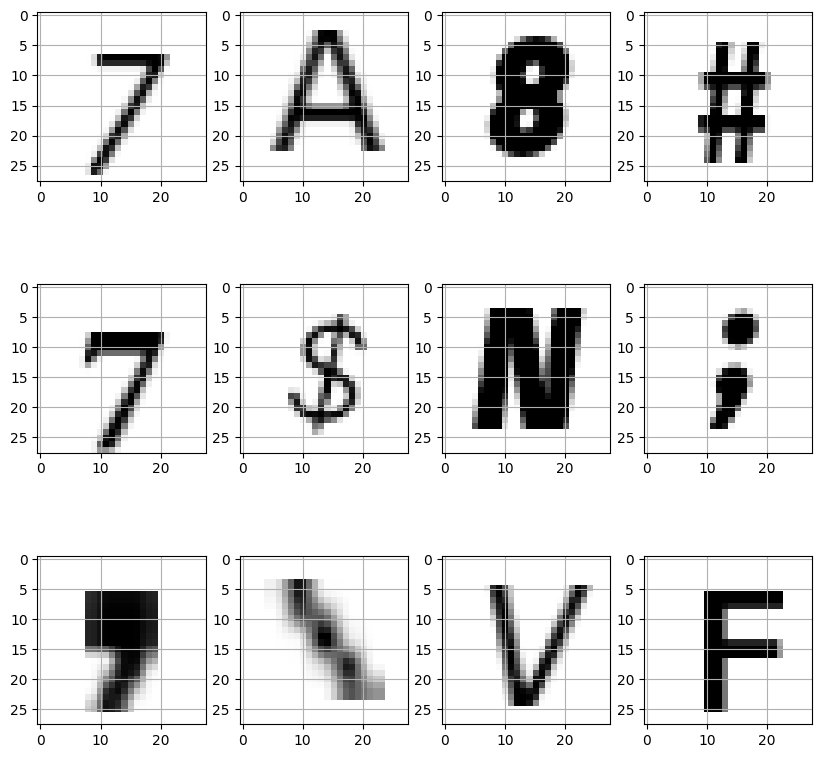

In [ ]:
# displaying the charecters of our dataset
random = shuffle(X_train[:500]) #Randomly shuffle
fig,ax = plt.subplots(3,4 , figsize = (10,10))
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()

In [ ]:
layers = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], layers)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],layers)

#normalizing the image data
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (219274, 28, 28, 1),(54819, 28, 28, 1)


In [ ]:
model = Sequential ()

# 4 Conv with Maxpool and Dropout [25%] -> Flatten - >  Dense -> Dense -> output
model.add(Conv2D(filters = 32 , kernel_size = (3,3),input_shape = (length, height, layers), padding = 'same',))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(350))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)       

In [ ]:
#defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
batch_size = 64
epochs = 10
loss='categorical_crossentropy'
metrics = ['accuracy']
model.compile(loss = loss, optimizer = optimizer, metrics=metrics)

In [ ]:
#Training
history= model.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = batch_size ,
                   epochs = epochs, verbose = 1)

Epoch 1/10
3427/3427 [==============================] - 47s 9ms/step - loss: 0.6380 - accuracy: 0.8121 - val_loss: 0.4190 - val_accuracy: 0.8695
Epoch 2/10
3427/3427 [==============================] - 31s 9ms/step - loss: 0.4004 - accuracy: 0.8776 - val_loss: 0.2985 - val_accuracy: 0.9032
Epoch 3/10
3427/3427 [==============================] - 31s 9ms/step - loss: 0.3595 - accuracy: 0.8893 - val_loss: 0.2494 - val_accuracy: 0.9206
Epoch 4/10
3427/3427 [==============================] - 32s 9ms/step - loss: 0.3372 - accuracy: 0.8955 - val_loss: 0.2473 - val_accuracy: 0.9195
Epoch 5/10
3427/3427 [==============================] - 33s 10ms/step - loss: 0.3223 - accuracy: 0.8995 - val_loss: 0.2351 - val_accuracy: 0.9224
Epoch 6/10
3427/3427 [==============================] - 31s 9ms/step - loss: 0.3108 - accuracy: 0.9033 - val_loss: 0.2251 - val_accuracy: 0.9276
Epoch 7/10
3427/3427 [==============================] - 31s 9ms/step - loss: 0.3002 - accuracy: 0.9060 - val_loss: 0.2349 - val_a

In [ ]:
#Evaluating model accuracy on test data
score = model.evaluate(X_test,y_test, batch_size = batch_size,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:91.86%


In [ ]:
# Function for Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

1/1 [==============================] - 0s 19ms/step


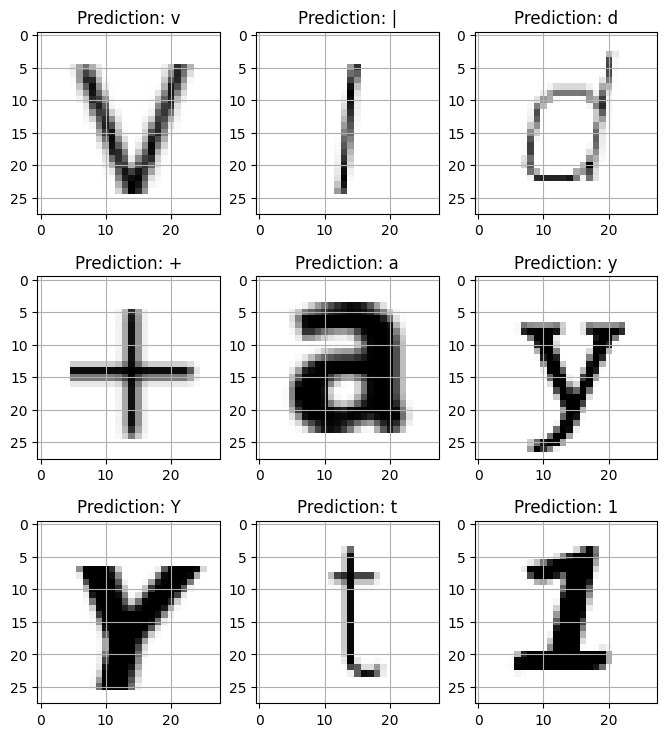

In [ ]:
#predicting the charecters using trained model
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) # reshaping it for displaying
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = label_dict_inv[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
# save model
model.save('my_model.h5')